# Mini Project (NLP) :-
## Resume Classification :

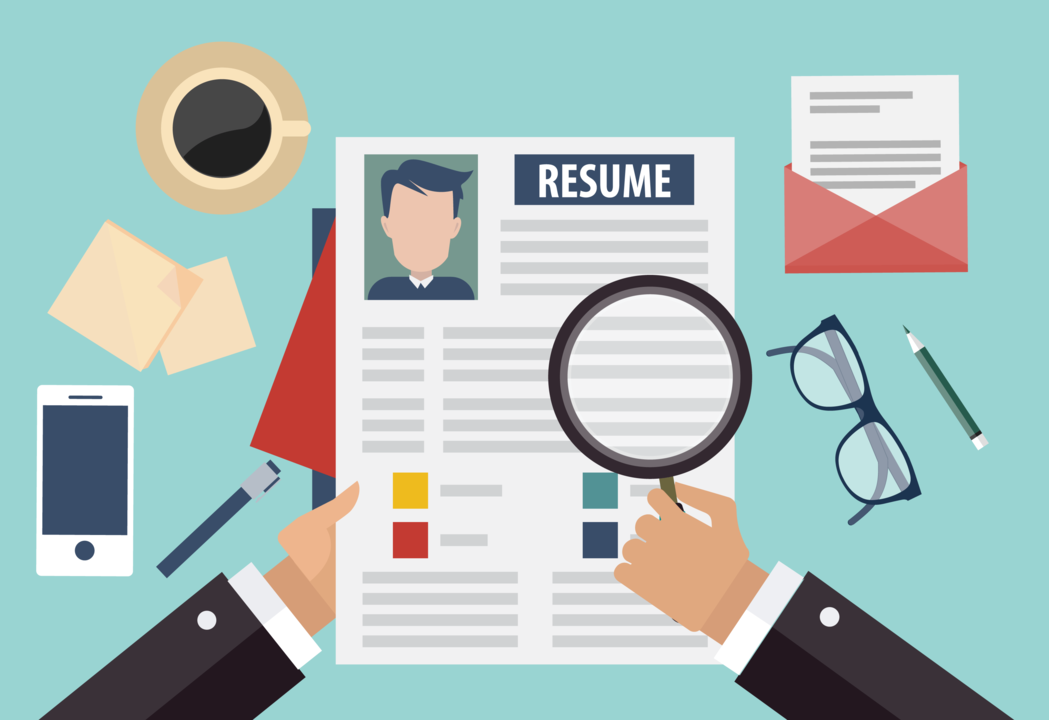

In [3]:
from IPython import display
display.Image("C:\\Users\\admin\\Desktop\\Pic\\Resume.png")

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import nltk
import seaborn
import string
import scipy
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
%matplotlib inline

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
df=pd.read_csv('/content/UpdatedResumeDataSet.csv')

In [3]:
df

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [4]:
df['Category'].nunique()

25

In [5]:
df['Category'].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

## Resumes In Different Catagoris :

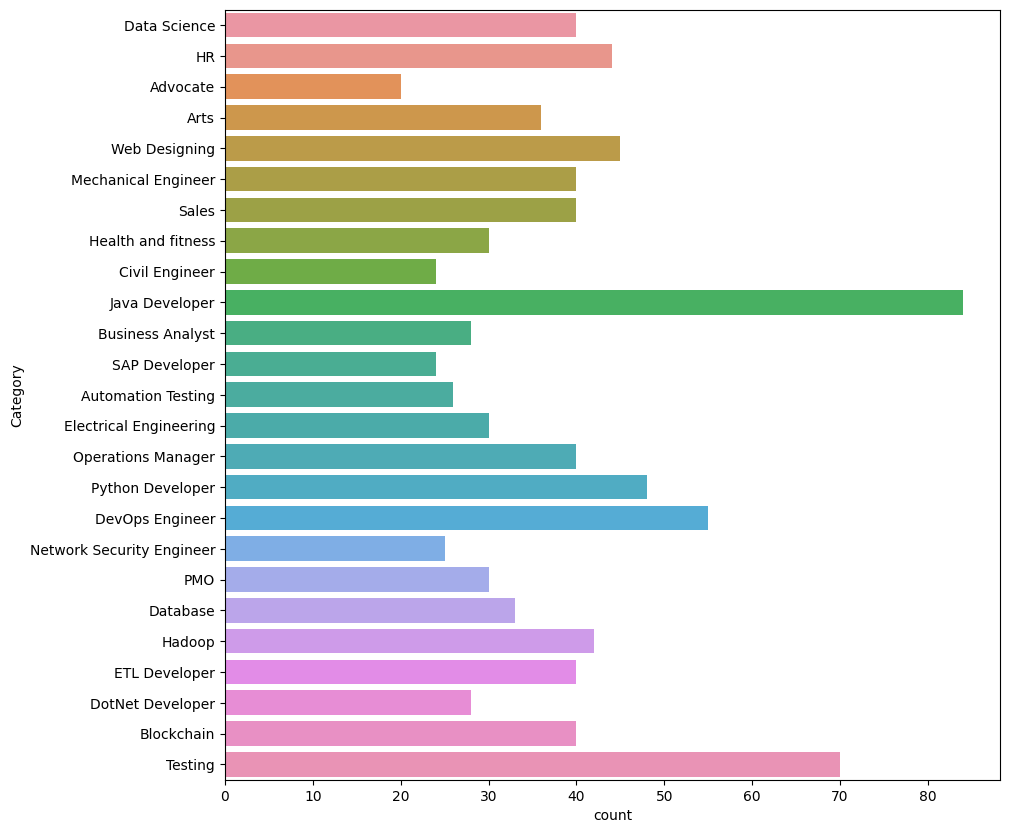

In [6]:
plt.figure(figsize=(10,10))
sns.countplot(y=df['Category'])
plt.show()

## Converting Into Lower Case :

In [7]:
df['Resume']=df['Resume'].str.lower()

In [8]:
df

,Category,Resume
0,Data Science,skills * programming languages: python (pandas...
1,Data Science,education details \r\nmay 2013 to may 2017 b.e...
2,Data Science,"areas of interest deep learning, control syste..."
3,Data Science,skills â¢ r â¢ python â¢ sap hana â¢ table...
4,Data Science,"education details \r\n mca ymcaust, faridab..."
...,...,...
957,Testing,computer skills: â¢ proficient in ms office (...
958,Testing,â willingness to accept the challenges. â ...
959,Testing,"personal skills â¢ quick learner, â¢ eagerne..."
960,Testing,computer skills & software knowledge ms-power ...


## Removeing Punctuations :

In [9]:
from string import punctuation
punc=punctuation
m_punc=punc.replace("'",'')
def remove_punc(text):
    return text.translate(str.maketrans('','',m_punc))
df['Resume']=df['Resume'].apply(lambda text:remove_punc(text))
df

,Category,Resume
0,Data Science,skills programming languages python pandas nu...
1,Data Science,education details \r\nmay 2013 to may 2017 be ...
2,Data Science,areas of interest deep learning control system...
3,Data Science,skills â¢ r â¢ python â¢ sap hana â¢ table...
4,Data Science,education details \r\n mca ymcaust faridaba...
...,...,...
957,Testing,computer skills â¢ proficient in ms office wo...
958,Testing,â willingness to accept the challenges â p...
959,Testing,personal skills â¢ quick learner â¢ eagernes...
960,Testing,computer skills software knowledge mspower po...


## Stopwords Treatment :

In [10]:
stop=stopwords.words('english')

In [11]:
def remove_stop(text):
  return " ".join([word for word in str(text).split() if word not in stop])
df['Resume']=df['Resume'].apply(lambda text:remove_stop(text))

In [12]:
df

,Category,Resume
0,Data Science,skills programming languages python pandas num...
1,Data Science,education details may 2013 may 2017 uitrgpv da...
2,Data Science,areas interest deep learning control system de...
3,Data Science,skills â¢ r â¢ python â¢ sap hana â¢ table...
4,Data Science,education details mca ymcaust faridabad haryan...
...,...,...
957,Testing,computer skills â¢ proficient ms office word ...
958,Testing,â willingness accept challenges â positive...
959,Testing,personal skills â¢ quick learner â¢ eagernes...
960,Testing,computer skills software knowledge mspower poi...


## Removeing URL & Special Character :

In [13]:
import re
def process(text):
  text=re.sub('http\s+\s',' ',text)
  text=re.sub('#\s+',' ',text)
  text=re.sub('@\s+',' ',text)
  text=re.sub('\s+',' ',text)
  text = re.sub(r'[^\x00-\x7F]', ' ', text)
  return text

df['Resume'] = df['Resume'].apply(lambda x: process(x))
df

,Category,Resume
0,Data Science,skills programming languages python pandas num...
1,Data Science,education details may 2013 may 2017 uitrgpv da...
2,Data Science,areas interest deep learning control system de...
3,Data Science,skills r python sap hana table...
4,Data Science,education details mca ymcaust faridabad haryan...
...,...,...
957,Testing,computer skills proficient ms office word ...
958,Testing,willingness accept challenges positive...
959,Testing,personal skills quick learner eagernes...
960,Testing,computer skills software knowledge mspower poi...


## Most Frequent Words :

In [14]:
from collections import Counter
con=Counter()
for text in df['Resume'].values:
  for word in text.split():
    con[word]+=1
    f=con.most_common(10)
fre=set([w for w,wc in f])  
fre  

{'1',
 'company',
 'data',
 'description',
 'details',
 'exprience',
 'management',
 'months',
 'project',
 'team'}

In [15]:
f,fre

([('exprience', 3829),
  ('company', 3536),
  ('project', 3353),
  ('months', 3283),
  ('description', 3122),
  ('details', 3096),
  ('data', 2129),
  ('management', 1989),
  ('team', 1922),
  ('1', 1875)],
 {'1',
  'company',
  'data',
  'description',
  'details',
  'exprience',
  'management',
  'months',
  'project',
  'team'})

## Word Cloud :

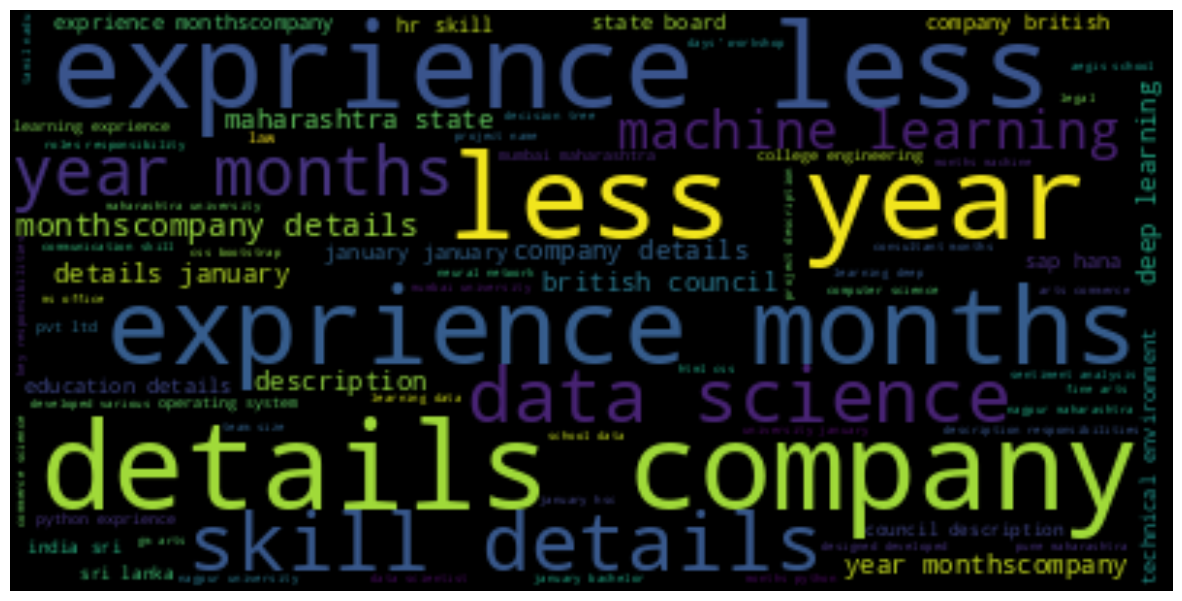

In [16]:
from wordcloud import WordCloud
total_words=[]
sentence=df['Resume'].values
CleanedSent=''
for i in range(1,150):
  CleanText=process(sentence[i])
  CleanedSent+=CleanText
  requ_word=nltk.word_tokenize(CleanText)
  for words in requ_word:
    if word not in stop and word not in m_punc:
      total_words.append(word)
we=WordCloud().generate(CleanedSent)
plt.figure(figsize=(15,10))
plt.imshow(we,interpolation='bilinear')
plt.axis('off')
plt.show()     

In [17]:
df

,Category,Resume
0,Data Science,skills programming languages python pandas num...
1,Data Science,education details may 2013 may 2017 uitrgpv da...
2,Data Science,areas interest deep learning control system de...
3,Data Science,skills r python sap hana table...
4,Data Science,education details mca ymcaust faridabad haryan...
...,...,...
957,Testing,computer skills proficient ms office word ...
958,Testing,willingness accept challenges positive...
959,Testing,personal skills quick learner eagernes...
960,Testing,computer skills software knowledge mspower poi...


In [18]:
df2=df.copy()
df2

,Category,Resume
0,Data Science,skills programming languages python pandas num...
1,Data Science,education details may 2013 may 2017 uitrgpv da...
2,Data Science,areas interest deep learning control system de...
3,Data Science,skills r python sap hana table...
4,Data Science,education details mca ymcaust faridabad haryan...
...,...,...
957,Testing,computer skills proficient ms office word ...
958,Testing,willingness accept challenges positive...
959,Testing,personal skills quick learner eagernes...
960,Testing,computer skills software knowledge mspower poi...


## Stemming :

In [19]:
from nltk.stem import PorterStemmer
stm=PorterStemmer()
df2['Resume']=df2['Resume'].apply(lambda x:' '.join([stm.stem(word) for word in x.split() ]))
df2

,Category,Resume
0,Data Science,skill program languag python panda numpi scipi...
1,Data Science,educ detail may 2013 may 2017 uitrgpv data sci...
2,Data Science,area interest deep learn control system design...
3,Data Science,skill r python sap hana tableau sap hana sql s...
4,Data Science,educ detail mca ymcaust faridabad haryana data...
...,...,...
957,Testing,comput skill profici ms offic word basic excel...
958,Testing,willing accept challeng posit think good learn...
959,Testing,person skill quick learner eager learn new thi...
960,Testing,comput skill softwar knowledg mspower point ms...


In [20]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
df['Category']=lab.fit_transform(df['Category'])
df2['Category']=lab.fit_transform(df2['Category'])

## Text Vectorization :

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer(max_features=1500)
vec.fit(df['Resume'])
feat=vec.transform(df['Resume'])
Y=df['Category']

## Train Test Split :

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(feat, Y, train_size=0.7, random_state=0)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((673, 1500), (289, 1500), (673,), (289,))

# Logistic Regression :

In [23]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [24]:
log.score(x_test,y_test)

0.9930795847750865

In [25]:
log.score(x_train,y_train)

0.9985141158989599

In [26]:
y_pre=log.predict(x_test)

In [27]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,classification_report

In [28]:
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         4
           2       0.89      1.00      0.94         8
           3       1.00      1.00      1.00        15
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00        14
           7       1.00      1.00      1.00        10
           8       1.00      0.87      0.93        15
           9       1.00      1.00      1.00        10
          10       1.00      1.00      1.00        11
          11       1.00      1.00      1.00        13
          12       1.00      1.00      1.00        12
          13       1.00      1.00      1.00        13
          14       1.00      1.00      1.00         9
          15       0.96      1.00      0.98        26
          16       1.00      1.00      1.00         9
          17       1.00    

## Wrong Predictions :

In [29]:
df_log=pd.DataFrame({'Actual':y_test,'Predicted':y_pre})
w=len(df_log.loc[df_log['Actual'] != df_log['Predicted']])
w

2

# Decision Tree Classifier :

In [30]:
from sklearn.tree import DecisionTreeClassifier
dis=DecisionTreeClassifier(random_state=0)
dis.fit(x_train,y_train)
y_pre_ds=dis.predict(x_test)

In [31]:
dis.score(x_test,y_test)

0.986159169550173

In [32]:
dis.score(x_train,y_train)

1.0

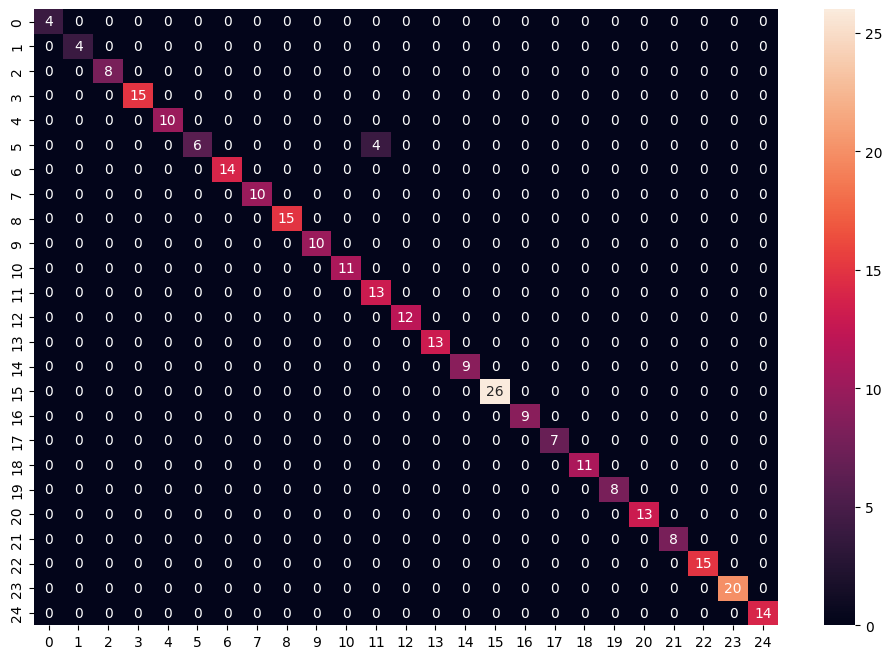

In [33]:
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(y_test,y_pre_ds),annot=True)
plt.show()

In [34]:
print(classification_report(y_test,y_pre_ds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00        15
           4       1.00      1.00      1.00        10
           5       1.00      0.60      0.75        10
           6       1.00      1.00      1.00        14
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00        15
           9       1.00      1.00      1.00        10
          10       1.00      1.00      1.00        11
          11       0.76      1.00      0.87        13
          12       1.00      1.00      1.00        12
          13       1.00      1.00      1.00        13
          14       1.00      1.00      1.00         9
          15       1.00      1.00      1.00        26
          16       1.00      1.00      1.00         9
          17       1.00    

## Wrong Predictions :

In [35]:
df_dis=pd.DataFrame({'Actual':y_test,'Predicted':y_pre_ds})
w1=len(df_dis.loc[df_dis['Actual'] != df_dis['Predicted']])
w1

4

# Random Forest Classifier :

In [36]:
from sklearn.ensemble import RandomForestClassifier
list1=[45,50,55,60,65,70,75,80,85,90,95,100]
for r in list1:
  ran1=RandomForestClassifier(n_estimators=r,random_state=0)
  ran1.fit(x_train,y_train)
  print('when n_estimators = ',r,' accuracy is = '+str(ran1.score(x_test,y_test)))
  print()

when n_estimators =  45  accuracy is = 1.0

when n_estimators =  50  accuracy is = 0.9965397923875432

when n_estimators =  55  accuracy is = 1.0

when n_estimators =  60  accuracy is = 1.0

when n_estimators =  65  accuracy is = 1.0

when n_estimators =  70  accuracy is = 0.9965397923875432

when n_estimators =  75  accuracy is = 0.9965397923875432

when n_estimators =  80  accuracy is = 0.9965397923875432

when n_estimators =  85  accuracy is = 0.9965397923875432

when n_estimators =  90  accuracy is = 0.9965397923875432

when n_estimators =  95  accuracy is = 0.9965397923875432

when n_estimators =  100  accuracy is = 0.9965397923875432



In [37]:
from sklearn.ensemble import RandomForestClassifier
ran=RandomForestClassifier(n_estimators=65,random_state=0)
ran.fit(x_train,y_train)
y_pre_ran = ran.predict(x_test)

In [38]:
ran.score(x_test,y_test)

1.0

In [39]:
ran.score(x_train,y_train)

1.0

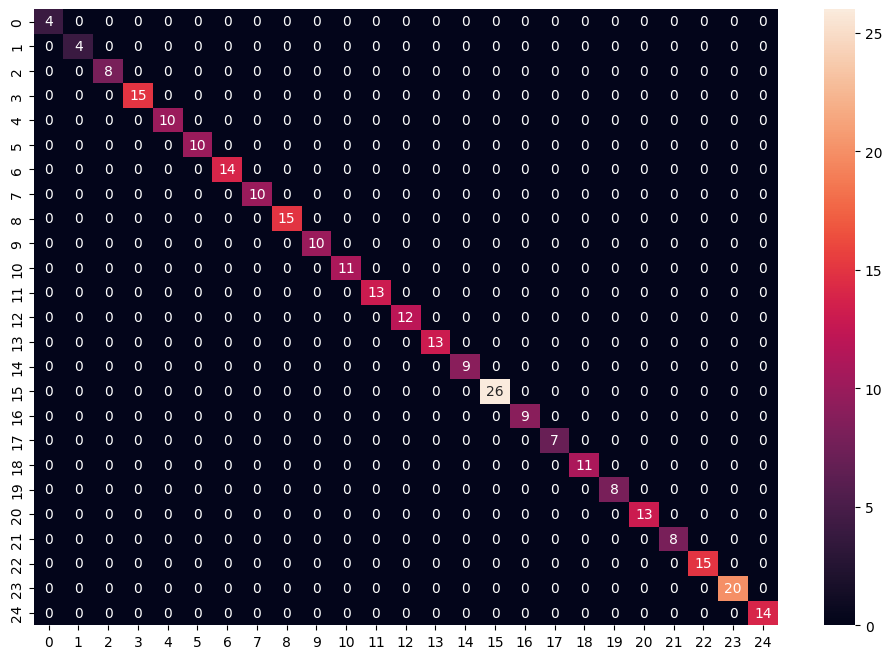

In [40]:
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(y_test,y_pre_ran),annot=True)
plt.show()

In [41]:
print(classification_report(y_test,y_pre_ran))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00        15
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00        14
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00        15
           9       1.00      1.00      1.00        10
          10       1.00      1.00      1.00        11
          11       1.00      1.00      1.00        13
          12       1.00      1.00      1.00        12
          13       1.00      1.00      1.00        13
          14       1.00      1.00      1.00         9
          15       1.00      1.00      1.00        26
          16       1.00      1.00      1.00         9
          17       1.00    

## Wrong Predictions :

In [42]:
df_ran=pd.DataFrame({'Actual':y_test,'Predicted':y_pre_ran})
w2=len(df_ran.loc[df_ran['Actual'] != df_ran['Predicted']])
w2

0

# SVM :

In [43]:
from sklearn.svm import SVC
kernel=['rbf','poly','linear','sigmoid']
for k in kernel:
  svc=SVC(kernel=k)
  svc.fit(x_train,y_train)
  y_pre_svm=svc.predict(x_test)
  df_svm=pd.DataFrame({'Actual':y_test,'Predicted':y_pre_svm})
  w3=len(df_svm.loc[df_svm['Actual'] != df_svm['Predicted']])
  print('for the kernel = ',k,' the testing accuracy is = '+str(svc.score(x_test,y_test)))
  print('for the kernel = ',k,' the training accuracy is = '+str(svc.score(x_train,y_train)))
  print(classification_report(y_test,y_pre_svm))
  print('total wrong prediction are = '+str(w3))
  print()


for the kernel =  rbf  the testing accuracy is = 0.9930795847750865
for the kernel =  rbf  the training accuracy is = 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         4
           2       0.89      1.00      0.94         8
           3       1.00      1.00      1.00        15
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00        14
           7       1.00      1.00      1.00        10
           8       1.00      0.87      0.93        15
           9       1.00      1.00      1.00        10
          10       1.00      1.00      1.00        11
          11       1.00      1.00      1.00        13
          12       1.00      1.00      1.00        12
          13       1.00      1.00      1.00        13
          14       1.00      1.00      1.00         9
          15 

In [44]:
svm=SVC(kernel='linear')
svm.fit(x_train,y_train)
y_pre_svm=svm.predict(x_test)

In [45]:
svm.score(x_test,y_test)

0.9965397923875432

In [46]:
svm.score(x_train,y_train)

1.0

# KNeighbors Classifier (KNN) :

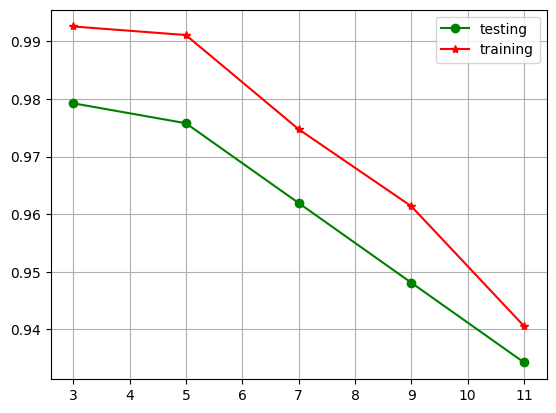

In [47]:
from sklearn.neighbors import KNeighborsClassifier
accuracy=[]
acc_train=[]
for i in range(3,13,2):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  accuracy.append(knn.score(x_test,y_test))
  acc_train.append(knn.score(x_train,y_train))
plt.plot([w for w in range(3,13,2)],accuracy,color='green',marker='o',
         label='testing')
plt.plot([t for t in range(3,13,2)],acc_train,color='red',marker='*',
         label='training')
plt.grid()
plt.legend()
plt.show()

In [48]:
Knn=KNeighborsClassifier(n_neighbors=3)
Knn.fit(x_train,y_train)
y_pre_knn=Knn.predict(x_test)

In [49]:
Knn.score(x_test,y_test)

0.9792387543252595

In [50]:
Knn.score(x_train,y_train)

0.9925705794947994

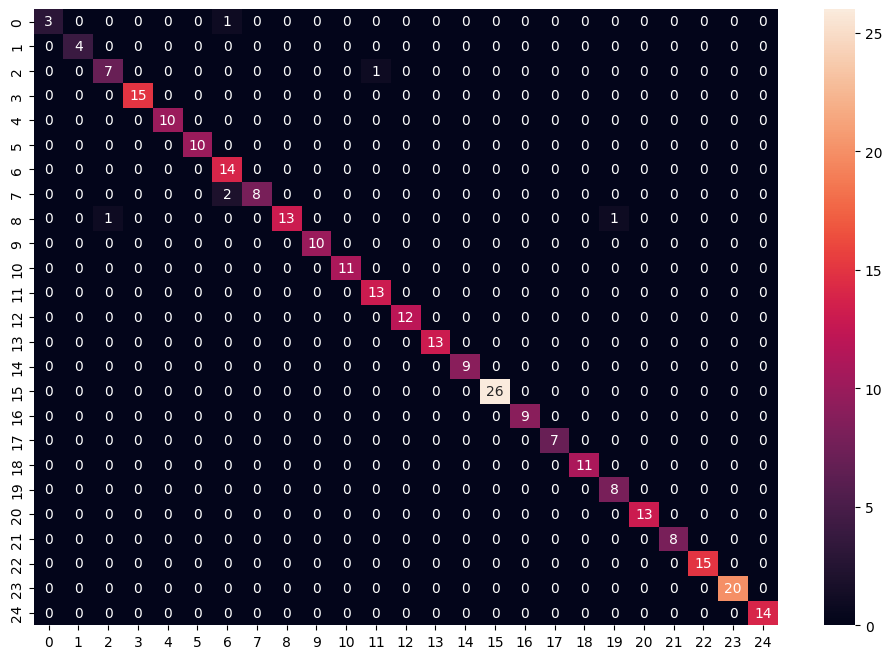

In [51]:
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(y_test,y_pre_knn),annot=True)
plt.show()

In [52]:
print(classification_report(y_test,y_pre_knn))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       1.00      1.00      1.00         4
           2       0.88      0.88      0.88         8
           3       1.00      1.00      1.00        15
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00        10
           6       0.82      1.00      0.90        14
           7       1.00      0.80      0.89        10
           8       1.00      0.87      0.93        15
           9       1.00      1.00      1.00        10
          10       1.00      1.00      1.00        11
          11       0.93      1.00      0.96        13
          12       1.00      1.00      1.00        12
          13       1.00      1.00      1.00        13
          14       1.00      1.00      1.00         9
          15       1.00      1.00      1.00        26
          16       1.00      1.00      1.00         9
          17       1.00    

## Wrong Perictions :

In [53]:
df_knn=pd.DataFrame({'Actual':y_test,'Predicted':y_pre_knn})
w4=len(df_knn.loc[df_knn['Actual'] != df_knn['Predicted']])
w4

6

# Naive Bayes :

In [54]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(x_train,y_train)
y_pre_nb=nb.predict(x_test)

In [55]:
nb.score(x_test,y_test)

0.9411764705882353

In [56]:
nb.score(x_train,y_train)

0.9658246656760773

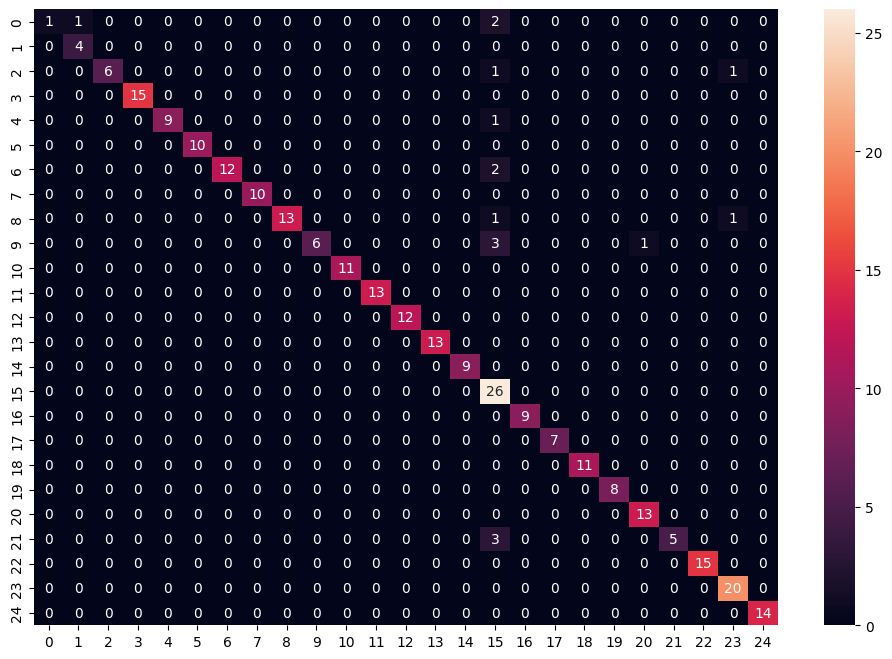

In [57]:
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(y_test,y_pre_nb),annot=True)
plt.show()

In [58]:
print(classification_report(y_test,y_pre_nb))

              precision    recall  f1-score   support

           0       1.00      0.25      0.40         4
           1       0.80      1.00      0.89         4
           2       1.00      0.75      0.86         8
           3       1.00      1.00      1.00        15
           4       1.00      0.90      0.95        10
           5       1.00      1.00      1.00        10
           6       1.00      0.86      0.92        14
           7       1.00      1.00      1.00        10
           8       1.00      0.87      0.93        15
           9       1.00      0.60      0.75        10
          10       1.00      1.00      1.00        11
          11       1.00      1.00      1.00        13
          12       1.00      1.00      1.00        12
          13       1.00      1.00      1.00        13
          14       1.00      1.00      1.00         9
          15       0.67      1.00      0.80        26
          16       1.00      1.00      1.00         9
          17       1.00    

## Wrong Perictions :

In [59]:
df_nb=pd.DataFrame({'Actual':y_test,'Predicted':y_pre_nb})
w5=len(df_nb.loc[df_nb['Actual'] != df_nb['Predicted']])
w5

17

# All Model Accuracy :

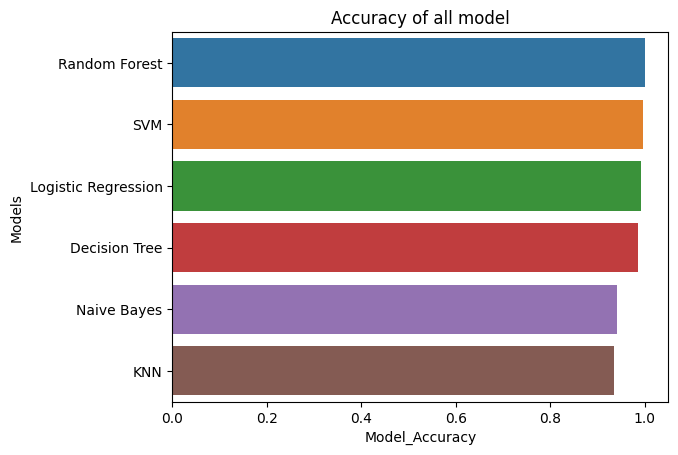

In [60]:
acc_df=pd.DataFrame({'Model':['Logistic Regression','Decision Tree','Random Forest','SVM','KNN','Naive Bayes'],
                     'Accuracy':[log.score(x_test,y_test),dis.score(x_test,y_test),ran.score(x_test,y_test),svm.score(x_test,y_test),
                                 knn.score(x_test,y_test),nb.score(x_test,y_test)]})
df_dd=acc_df.sort_values('Accuracy',ascending=False)
sns.barplot(data=df_dd, x='Accuracy', y='Model')
plt.xlabel('Model_Accuracy')
plt.ylabel('Models')
plt.title('Accuracy of all model')
plt.show()

# All Model Wrong Prediction :

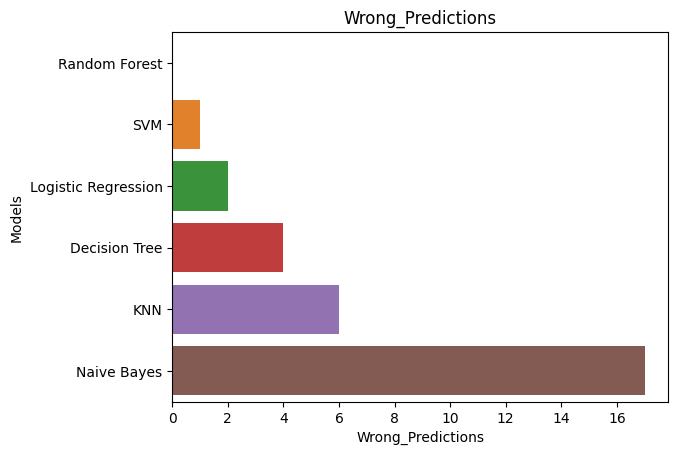

In [61]:
w_df=pd.DataFrame({'Model':['Logistic Regression','Decision Tree','Random Forest','SVM','KNN','Naive Bayes'],
                   'Wrong_Predictions':[w,w1,w2,w3,w4,w5]})
w_dff=w_df.sort_values('Wrong_Predictions')
sns.barplot(data=w_dff, x='Wrong_Predictions', y='Model')
plt.xlabel('Wrong_Predictions')
plt.ylabel('Models')
plt.title('Wrong_Predictions')
plt.show()